# a

In [1]:
import torch
from torchsummary import summary
import sys
import numpy as np
sys.path.append('../../LearningByCheating')
from bird_view.models.image import ImagePolicyModelSS
import matplotlib.pyplot as plt
model = ImagePolicyModelSS('resnet34').to('cuda')
model.load_state_dict(torch.load('/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-915.th'))
model.eval()
rgb_left = np.load('rgb_left.npy')
rgb_right = np.load('rgb_right.npy')
model(torch.Tensor(np.transpose(rgb_left, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor(np.transpose(rgb_right, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor([25/3.6]).to('cuda'), torch.Tensor(np.array([[0, 0, 0, 1]])).to('cuda'), torch.Tensor(1).to('cuda'))
# summary(model, (torch.randn(1, 3, 160, 384).to('cuda'),torch.randn(1, 3, 160, 384).to('cuda'), torch.randn(1).to('cuda'), torch.randn(1, 4).to('cuda'), torch.randn(1).to('cuda')))


torch.Size([1, 3, 160, 384]) torch.Size([1]) torch.Size([1, 4]) torch.Size([1])
h torch.Size([1, 64, 40, 96])
loc torch.Size([1, 4, 5, 2])


../../LearningByCheating/bird_view/models/image.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('/home/moonlab/Documents/LearningByCheating/drive/{}.npy'.format(i),np.array(weight))


tensor([[[ 0.4406, -0.8974],
         [ 0.4645, -0.8974],
         [ 0.4671, -0.8974],
         [ 0.4358, -0.8498],
         [ 0.4728, -0.8462]]], device='cuda:0', grad_fn=<SumBackward1>)

In [2]:
x = np.load('1.npy', allow_pickle=True)
print(x.shape)

(8,)


In [3]:
feature = x[0][0]
print(feature.shape)
weight = x[1]
print(weight.shape)
pos_x = x[2]
print(pos_x.shape)
pos_y = x[3]
print(pos_y.shape)
pos_x_weight = x[4]
print(pos_x_weight.shape)
pos_y_weight = x[5]
print(pos_y_weight.shape)
expected_xy = x[6]
print(expected_xy.shape)
feature_keypoints = x[7]
print(feature_keypoints.shape)

(5, 40, 96)
(5, 3840)
(3840,)
(3840,)
(5, 3840)
(5, 3840)
(5, 2)
(1, 5, 2)


In [4]:
def plot(feature):
    for i in range(5):
        # print(np.where(x[i] == 0.0, x[i]))
        plt.imshow(feature[i])
        plt.colorbar()
        # print(np.sum(feature[i], axis=0, keepdims=True))
        plt.show()

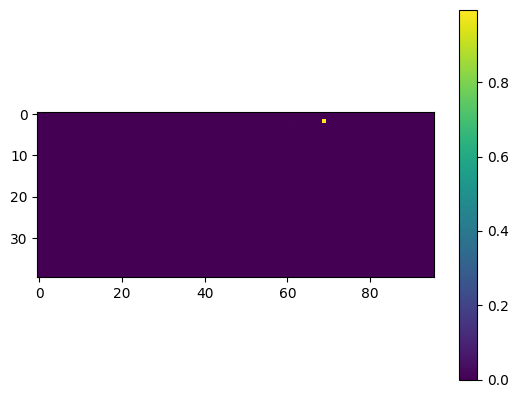

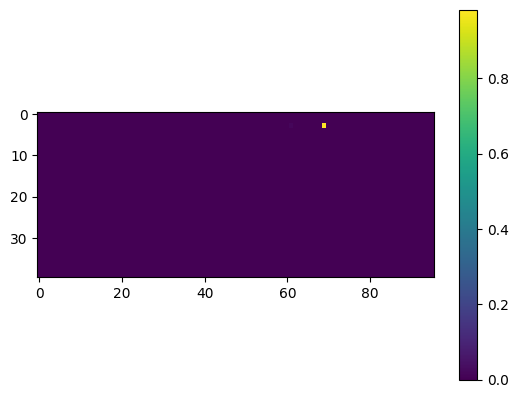

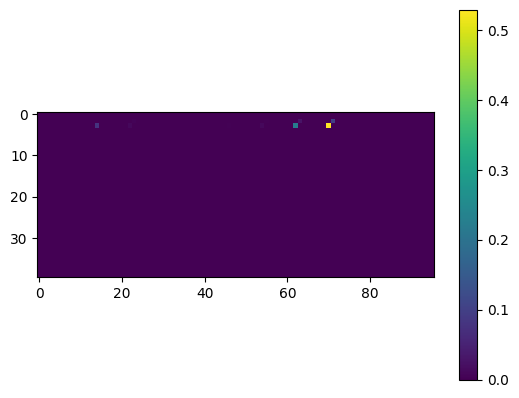

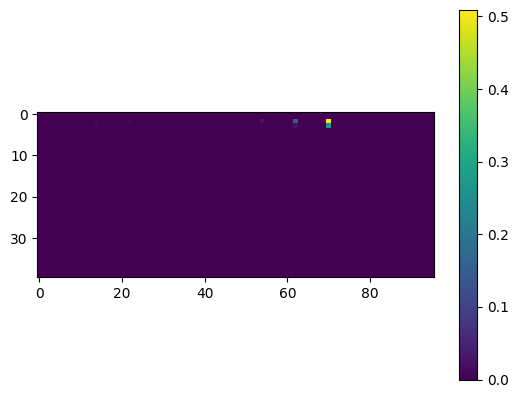

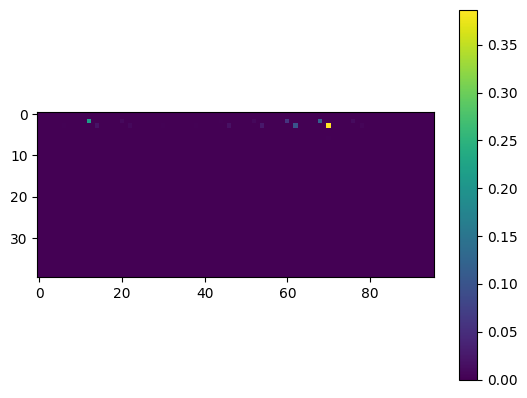

In [5]:
plot(weight.reshape(5, 40, 96))

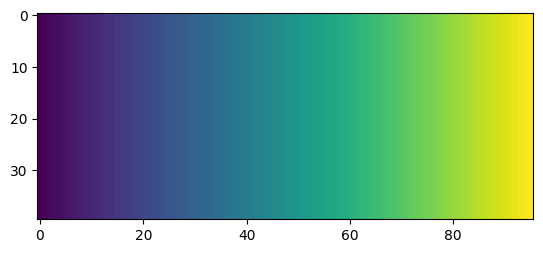

In [14]:
plt.imshow(pos_x.reshape(40, 96))

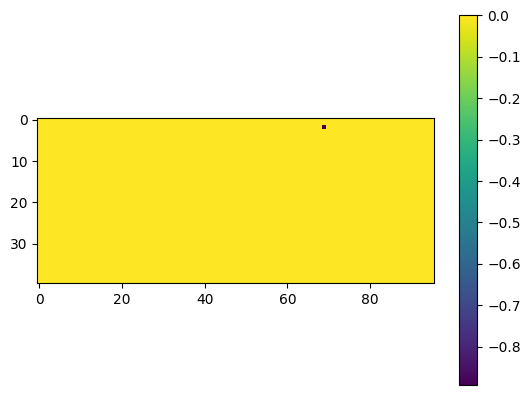

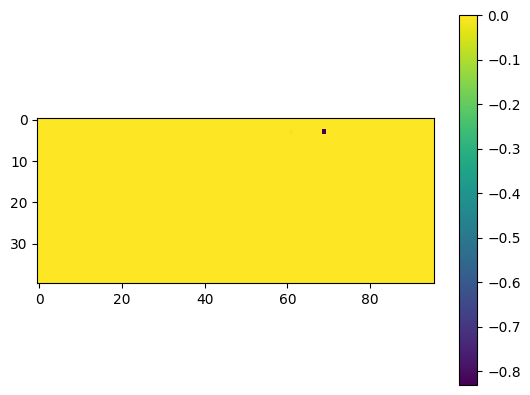

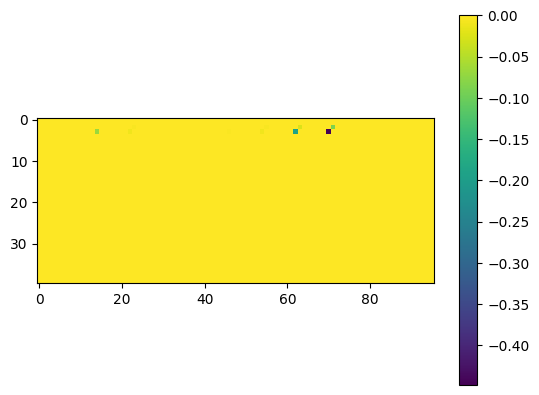

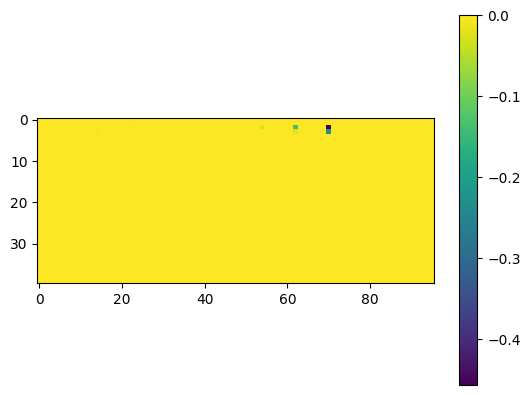

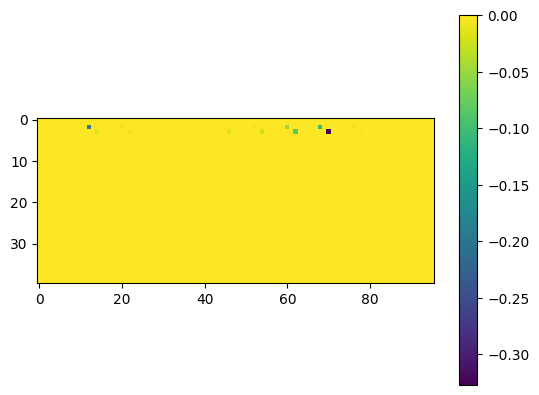

In [8]:
plot(pos_y_weight.reshape(5, 40, 96))

In [ ]:
for i in range(5):
    # print(np.where(x[i] == 0.0, x[i]))
    plt.imshow(x[i], cmap='gray')
    print(np.sum(x[i], axis=0, keepdims=True))
    plt.show()

In [13]:
print(expected_xy)
np.sum(expected_xy, axis=0)

[[ 0.45174897 -0.8974359 ]
 [ 0.44930932 -0.8461539 ]
 [ 0.3120067  -0.85311526]
 [ 0.41105688 -0.8821281 ]
 [ 0.1025184  -0.8668164 ]]


array([ 1.7266403, -4.3456497], dtype=float32)

In [16]:
np.sum(pos_x_weight, axis=1)

array([0.45174897, 0.44930932, 0.31200677, 0.41105685, 0.1025184 ],
      dtype=float32)

In [17]:
np.sum(pos_y_weight, axis=1)

array([-0.89743584, -0.8461539 , -0.85311526, -0.8821281 , -0.86681634],
      dtype=float32)

In [18]:
pos_x_weight.shape

(5, 3840)

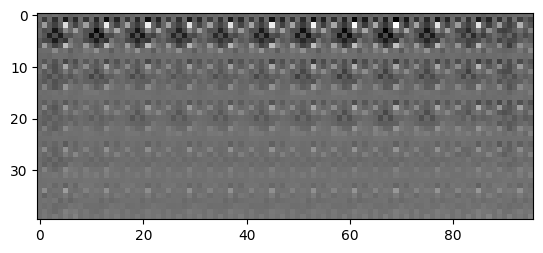

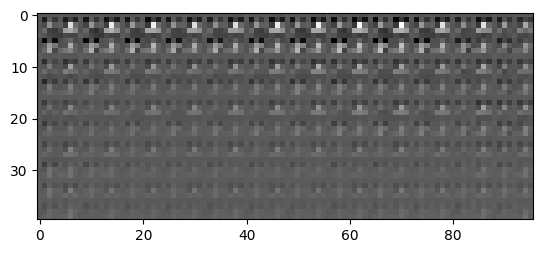

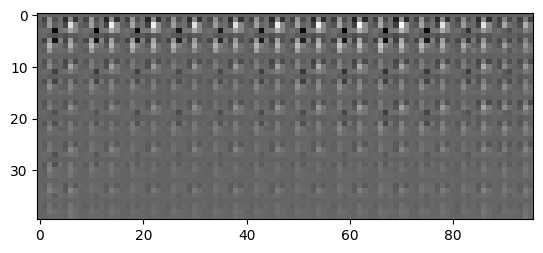

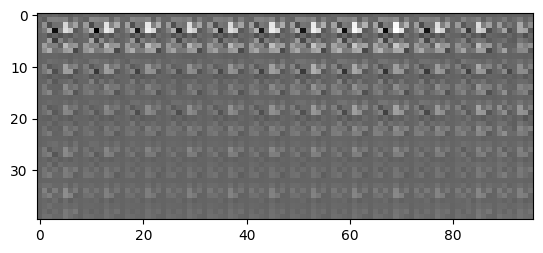

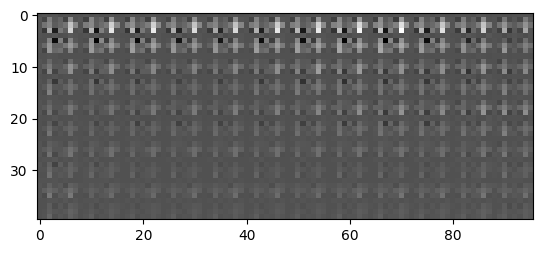

In [8]:
y = np.load('y.npy')
for i in range(5):
    plt.imshow(y[0][i], cmap='gray')
    plt.show()

# d


In [2]:
import numpy as np
import matplotlib.pyplot as plt

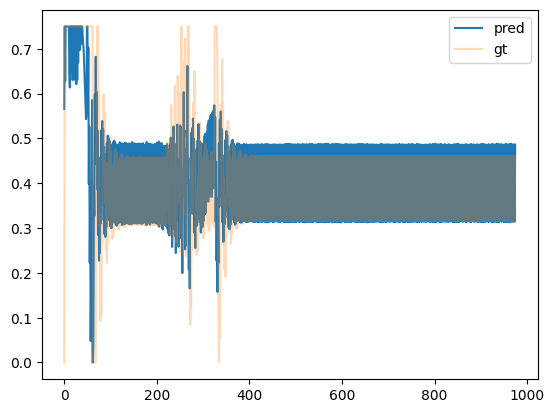

In [43]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[0])
plt.plot(tune[3], alpha=0.3)
plt.legend(['pred', 'gt'])

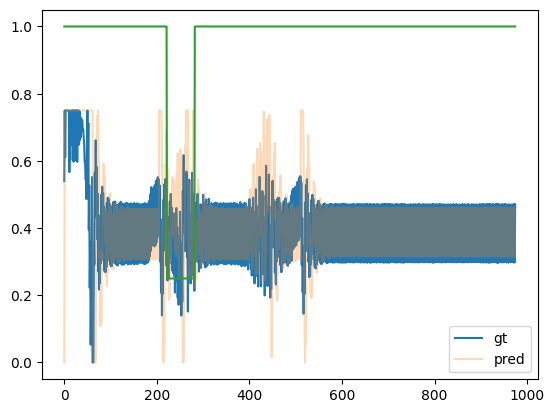

In [22]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[0])
plt.plot(tune[3], alpha=0.3)
plt.plot(tune[-1]/4)
plt.legend(['gt', 'pred'])

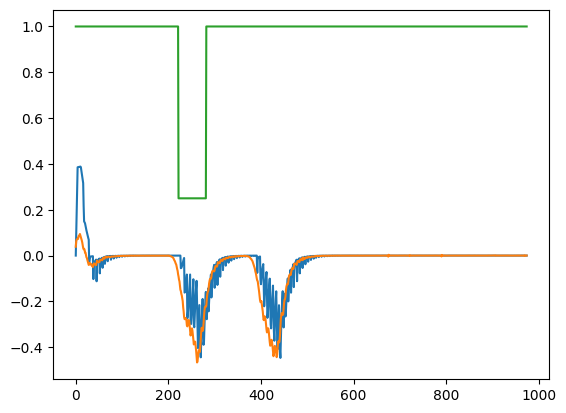

In [24]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[4])
plt.plot(tune[1])
plt.plot(tune[-1]/4)


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(tune[0], tune[3])

0.036957202282749874

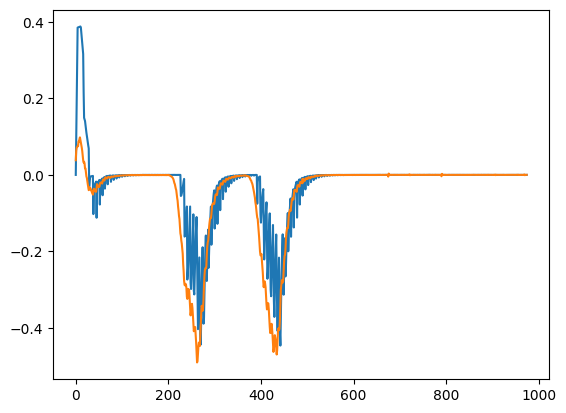

In [5]:
tune = np.load('tune_000.npy', allow_pickle=True)
plt.plot(tune[4])
plt.plot(tune[1])


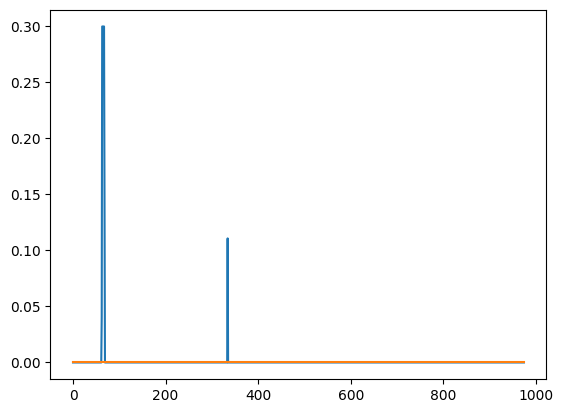

In [22]:
plt.plot(tune[5])
plt.plot(tune[2])

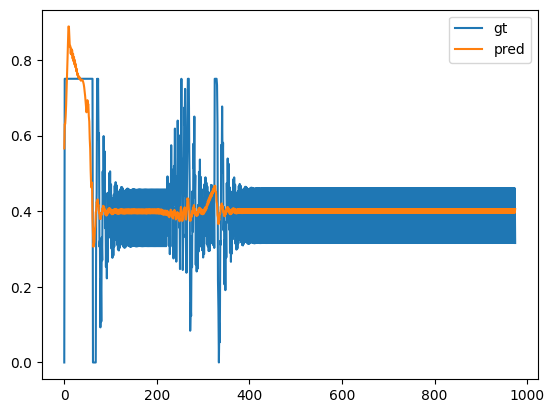

In [23]:
plt.plot(tune[3])
plt.plot(tune[0])
plt.legend(['gt', 'pred'])

In [2]:
import numpy as np
import lmdb
import cv2
import pygame
import torch
import sys
import glob
from data_util import YamlConfig, load_config
from pygame.locals import Color

try:
    sys.path.append(glob.glob('../PythonAPI')[0])
    sys.path.append(glob.glob('../bird_view')[0])
    sys.path.append(glob.glob('../drive')[0])
    sys.path.append('../LearningByCheating')
except IndexError as e:
    pass
from models.image import ImagePolicyModelSS
from utils.train_utils import one_hot
from torchvision import transforms
birdview_transform = transforms.ToTensor()
import pandas as pd
BLUE = Color('blue')
RED = Color('red')
ORANGE = Color('orange')
PIXELS_PER_METER = 5
N_STEP=5
CROP_SIZE = 320
MAP_SIZE=320
config = {'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
            'image_args' : {
                'model_path': '/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-999.th',
                }
            }
image_net = ImagePolicyModelSS(backbone='resnet34').to(config['device'])
image_net.load_state_dict(torch.load(config['image_args']['model_path']))
image_net.eval()

pygame 2.1.2 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


ImagePolicyModelSS(
  (conv_left): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

In [3]:

def unproject(output, world_y=0.88, fov=90):

    cx, cy = np.array([384, 160]) / 2
    
    w, h = np.array([384, 160])
    
    f = w /(2 * np.tan(fov * np.pi / 360))
    
    xt = (output[...,0:1] - cx) / f
    yt = (output[...,1:2] - cy) / f
    
    world_z = world_y / yt
    world_x = world_z * xt
    
    world_output = np.stack([world_x, world_z],axis=-1)
    
    world_output = world_output.squeeze()
    
    return world_output

In [6]:
pygame.init()
pygame.font.init()
args = YamlConfig.from_nested_dicts(load_config('config/hound_config.yaml'))

display = pygame.display.set_mode(
                    (args.width, args.height),
                    pygame.HWSURFACE | pygame.DOUBLEBUF)
WORLD_LOCATIONS = []
display.fill((0,0,0))
env = lmdb.open('/home/moonlab/Documents/LearningByCheating/dataset/train/001')
with env.begin() as txn:
    length = int(txn.get(str('len').encode()))
    for i in range(length-25):
        rgb_left = np.fromstring(txn.get(('rgb_left_%04d'%i).encode()), np.uint8).reshape(160,384,3)
        rgb_right = np.fromstring(txn.get(('rgb_right_%04d'%i).encode()), np.uint8).reshape(160,384,3)
        bird_view = np.fromstring(txn.get(('birdview_%04d'%i).encode()), np.uint8).reshape(320,320,8)
        # removing traffic channels
        measurement = np.frombuffer(txn.get(('measurements_%04d'%i).encode()), np.float32)
        display.blit(pygame.surfarray.make_surface(rgb_left.swapaxes(0, 1)), (0, 0))
        display.blit(pygame.surfarray.make_surface(rgb_right.swapaxes(0, 1)), (0, 160))
        display.blit(pygame.surfarray.make_surface(np.zeros((320, 320))), (704, 0))
        ox, oy, oz, ori_ox, ori_oy, vx, vy, vz, ax, ay, az, cmd, gt_steer, gt_throttle, gt_brake, manual, gear, traffic_light  = measurement

        rgb_left = birdview_transform(rgb_left)
        rgb_right = birdview_transform(rgb_right)
        rgb_left = rgb_left[None, :].to(config['device'])
        rgb_right = rgb_right[None, :].to(config['device'])
        traffic_light = torch.Tensor([traffic_light]).to(config['device'])
        command = one_hot(torch.Tensor([cmd])).to(config['device'])
        speed = np.sqrt(vx**2 + vy**2+vz**2)
        # print(float(speed)*18/5)
        speed = torch.Tensor([float(speed)]).to(config['device'])
        with torch.no_grad():
            _image_locations = image_net(rgb_left, rgb_right, speed, command, traffic_light)
        
        _image_locations = _image_locations.squeeze().detach().cpu().numpy()
        _world_locations = unproject((_image_locations + 1)*np.array([384, 160])/2)
        WORLD_LOCATIONS.append(_world_locations)
        pygame.display.update()
pygame.quit()

/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app
/home/moonlab/anaconda3/envs/karthik/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [8]:
WORLD_LOCATIONS = np.array(WORLD_LOCATIONS)
print(WORLD_LOCATIONS.shape)

(975, 5, 2)


In [ ]:
from models.controller import CustomController, PIDController
from models.controller import ls_circle
from models import common
from sklearn.metrics import mean_squared_error
steer_points = {"1": 4, "2": 4, "3": 2, "4": 4}
import itertools
import pandas as pd

hyper_params = {
    'S_KP': np.arange(0, 1, 0.1),
    'S_KI': np.arange(0, 1, 0.1),
    'S_KD': np.arange(0, 1, 0.1),
    'T_KP': np.arange(0, 1, 0.1),
    'T_KI': np.arange(0, 1, 0.1),
    'T_KD': np.arange(0, 1, 0.1),
}
df = pd.DataFrame(columns=['S_KP', 'S_KI', 'S_KD', 'T_KP', 'T_KI', 'T_KD', 'loss_T', 'loss_S'])


a = hyper_params.values()
combinations = list(itertools.product(*a))

for c in combinations:
    pred_t = []
    pred_s = []
    pred_b = []
    gt_t = []
    gt_b = []
    gt_s = []
    CMD = []
    pid = {
    "1" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Left
    "2" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Right
    "3" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Straight
    "4" : {"Kp": c[0], "Ki": c[1], "Kd":c[2]}, # Follow
    }
    turn_control = CustomController(pid, dt=0.05)
    speed_control = PIDController(K_P=c[3], K_I=c[4], K_D=c[5], fps=20)
    for _world_locations in WORLD_LOCATIONS:
        targets = [(0, 0)]

        for i in range(5):
            pixel_dx, pixel_dy = _world_locations[i]
            angle = np.arctan2(pixel_dx, pixel_dy)
            dist = np.linalg.norm([pixel_dx, pixel_dy])

            targets.append([dist * np.cos(angle), dist * np.sin(angle)])

        targets = np.array(targets)
        target_speed = np.linalg.norm(targets[:-1] - targets[1:], axis=1).mean() / (5 * 0.05)

        center, r = ls_circle(targets)
        n = steer_points.get(str(int(cmd)), 1)
        closest = common.project_point_to_circle(targets[n], center, r)
        
        
        
        v = [1.0, 0.0, 0.0]
        w = [closest[0], closest[1], 0.0]
        alpha = common.signed_angle(v, w)
        acceleration = target_speed - speed
        steer = turn_control.run_step(alpha, int(cmd))
        throttle = speed_control.step(acceleration)
        brake = 0.0
        steer = np.clip(steer, -1.0, 1.0)
        throttle = np.clip(throttle.detach().cpu(), 0.0, 0.75)
        brake = np.clip(brake, 0.0, 1.0)
        pred_t.append(throttle)
        pred_s.append(steer)
        pred_b.append(brake)
        gt_t.append(gt_throttle)
        gt_s.append(gt_steer)
        gt_b.append(gt_brake)
        CMD.append(cmd)
    pred_t = np.array(pred_t)
    pred_s = np.array(pred_s)
    pred_b = np.array(pred_b)
    gt_t = np.array(gt_t)
    gt_s = np.array(gt_s)
    gt_b = np.array(gt_b)
    CMD = np.array(CMD)
    print(c)
    print(c[0], c[1], c[2], c[3],c[4], c[5], mean_squared_error(pred_t, gt_t), mean_squared_error(pred_s, gt_s))
    dict = {'S_KP': c[0], 'S_KI': c[1], 'S_KD': c[2], 'T_KP': c[3], 'T_KI': c[4], 'T_KD': c[5], 'loss_T':mean_squared_error(pred_t, gt_t), 'loss_S':mean_squared_error(pred_s, gt_s)}
    df = df.append(dict, ignore_index=True)
df.to_csv('tune.csv')

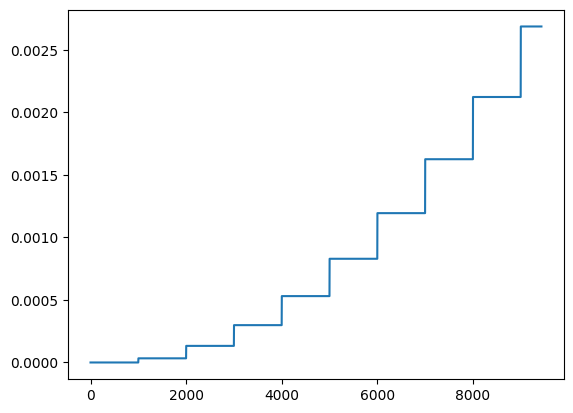

In [30]:
import matplotlib.pyplot as plt
# plt.plot(df['loss_T'])
plt.plot(df['loss_S'])

In [32]:
df.to_csv('tune.csv')

# d


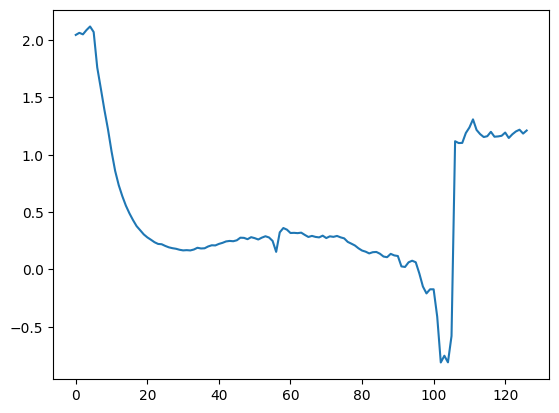

In [5]:
import matplotlib.pyplot as plt
import numpy as np

accel = np.load('acceleration.npy')
steer = np.load('steer.npy')

plt.plot(accel)

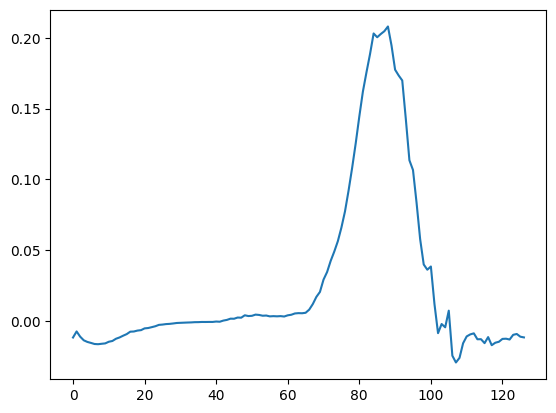

In [6]:
plt.plot(steer)

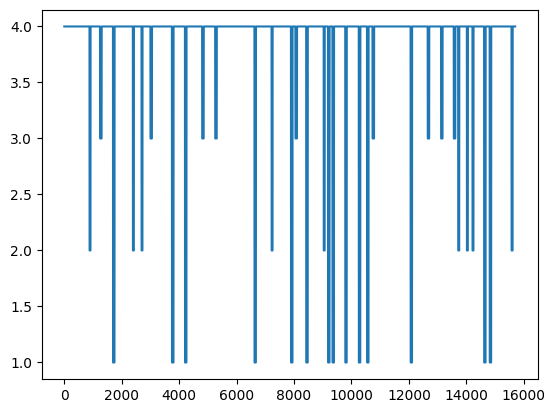

In [20]:
import numpy as np
import matplotlib.pyplot as plt
_cmd = np.load('run2/_cmd.npy')
plt.plot(_cmd)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
_cmd = np.load('run3/data.npy')
_cmd.shape
# plt.plot(_cmd[0])

(59, 11)

In [5]:
import carla
client = carla.Client('localhost', 2000)
world = client.get_world()
blueprint = world.get_blueprint_library().filter('vehicle.*')

In [6]:
for i in blueprint:
    if int(i.get_attribute('number_of_wheels')) == 2:
        print(i)

ActorBlueprint(id=vehicle.harley-davidson.low_rider,tags=[low_rider, harley-davidson, vehicle])
ActorBlueprint(id=vehicle.vespa.zx125,tags=[zx125, vespa, vehicle])
ActorBlueprint(id=vehicle.diamondback.century,tags=[century, diamondback, vehicle])
ActorBlueprint(id=vehicle.gazelle.omafiets,tags=[omafiets, gazelle, vehicle])
ActorBlueprint(id=vehicle.bh.crossbike,tags=[crossbike, bh, vehicle])
ActorBlueprint(id=vehicle.kawasaki.ninja,tags=[ninja, kawasaki, vehicle])
ActorBlueprint(id=vehicle.yamaha.yzf,tags=[yzf, yamaha, vehicle])


In [10]:
import carla
client = carla.Client('localhost', 2000)
world = client.get_world()
actors = world.get_actors()
for actor in  world.get_actors():
    print(actor.get_attribute('role_name'))

In [11]:
world.get_actors()